(512, 512, 3)


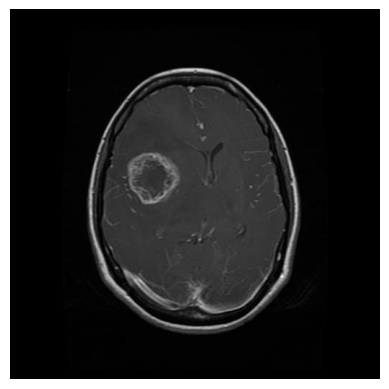

In [44]:
import imageio as iio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import cv2
img1 = cv2.imread("Te-gl_0014.jpg", 1)
plt.axis('off')
plt.imshow(img1)
#img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # conversion des triplets BVR en gris
print(img1.shape)

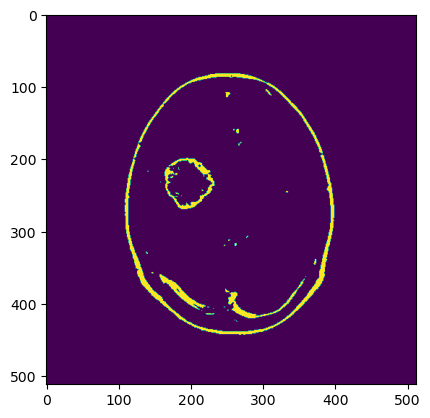

In [3]:
ret,th=cv2.threshold(img1, 100,110,cv2.THRESH_BINARY)
plt.imshow(th)

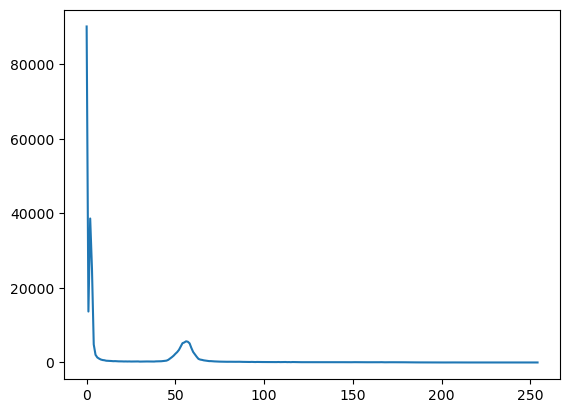

In [4]:
plt.plot(ndi.histogram(img1, min=0, max=np.max(img1), bins=255))
plt.show()

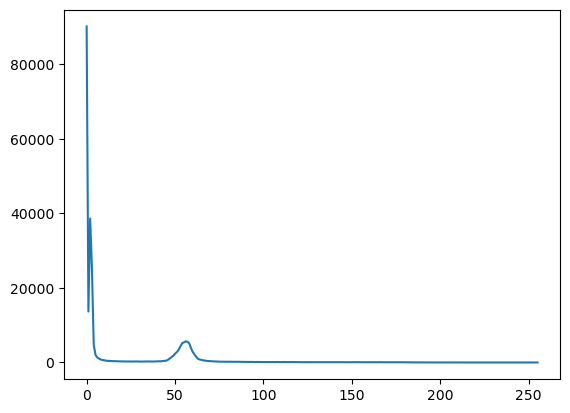

In [5]:
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,img1.shape[0]):      # énumère les lignes
    for j in range(0,img1.shape[1]):  # énumère les colonnes
        hist[img1[i,j]] = hist[img1[i,j]] + 1
#hist[y[0,0]]=0
#print(hist)
plt.plot(hist)
plt.show()

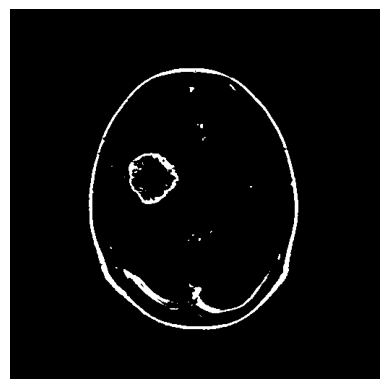

In [6]:
gm_min = 100
gm_max = 200
brain_mask1 = np.where(img1 > gm_min, 1, 0)
brain_mask2 = np.where(img1 < gm_max, 1, 0)
brain_mask = brain_mask1 + brain_mask2
brain_mask = np.where(brain_mask == 2, 1, 0)
plt.imshow(brain_mask1, cmap='gray')
plt.axis('off')
plt.show()
#print(brain_mask)

Threshold Based Segmentation

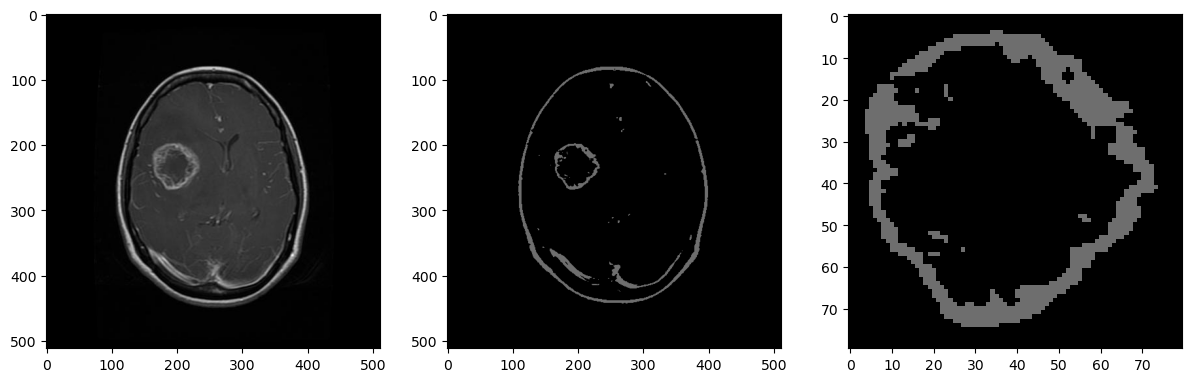

In [45]:
ret, thresh1 = cv2.threshold(img1, 100, 110, cv2.THRESH_BINARY)
#plt.figure(figsize=(8, 8))
#plt.axis("off")
fig = plt.figure()
fig.add_subplot(2,5,1)
plt.imshow(img1)
fig.add_subplot(2,5,2)
plt.imshow(thresh1)
fig.add_subplot(2,5,3)
plt.imshow(thresh1[195:275,160:240]) #Rogne
fig.set_figheight(11)
fig.set_figwidth(25)

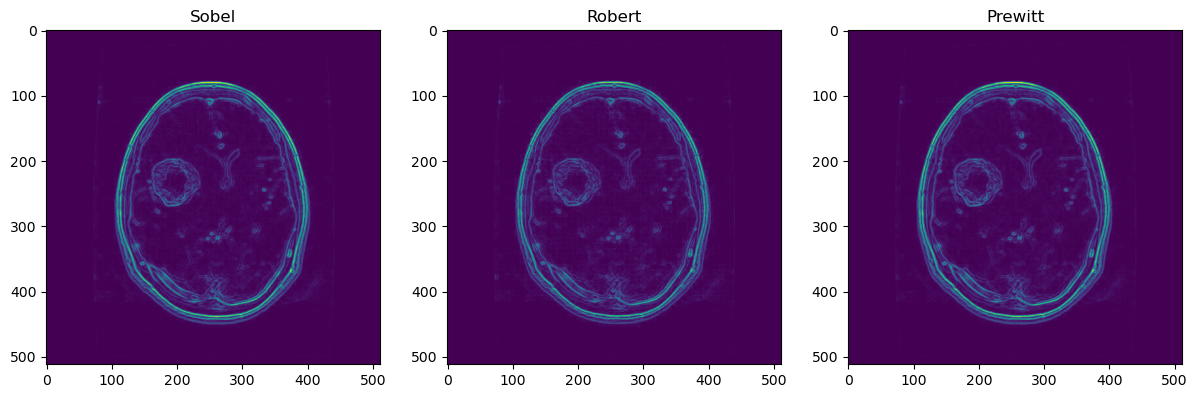

In [40]:
from skimage import filters
import skimage
sobel_image = filters.sobel(img1)
roberts_image = filters.roberts(img1)
prewitt_image = filters.prewitt(img1)

fig = plt.figure()
fig.add_subplot(2,5,1)
plt.title("Sobel")
plt.imshow(sobel_image)
fig.add_subplot(2,5,2)
plt.title("Robert")
plt.imshow(roberts_image)
fig.add_subplot(2,5,3)
plt.title("Prewitt")
plt.imshow(prewitt_image)
fig.set_figheight(11)
fig.set_figwidth(25)
